In [1]:
import time
import tensorflow as tf
import numpy as np
import pandas as pd
from scipy.misc import imread
from alexnet import AlexNet

In [4]:
sign_names = pd.read_csv('signnames.csv')
nb_classes = 43

x = tf.placeholder(tf.float32, (None, 32, 32, 3))
resized = tf.image.resize_images(x, 227, 227)

# NOTE: By setting `feature_extract` to `True` we return
# the second to last layer.
fc7 = AlexNet(resized, feature_extract=True)

# TODO: Define a new fully connected layer followed by a softmax activation to classify
# the traffic signs. Assign the result of the softmax activation to `probs` below.
shape = (fc7.get_shape().as_list()[-1], nb_classes)  # use this shape for the weight matrix

fc8W = tf.Variable(tf.truncated_normal(shape))
fc8b = tf.Variable(tf.zeros(nb_classes))

logits = tf.matmul(fc7, fc8W)+fc8b
probs = tf.nn.softmax(logits)


#init = tf.global_variables_initializer() # This line is not supported in this tensorflow version
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

In [5]:
# Read Images
im1 = imread("construction.jpg").astype(np.float32)
im1 = im1 - np.mean(im1)

im2 = imread("stop.jpg").astype(np.float32)
im2 = im2 - np.mean(im2)

In [6]:
# Run Inference
t = time.time()
output = sess.run(probs, feed_dict={x: [im1, im2]})

# Print Output
for input_im_ind in range(output.shape[0]):
    inds = np.argsort(output)[input_im_ind, :]
    print("Image", input_im_ind)
    for i in range(5):
        print("%s: %.3f" % (sign_names.ix[inds[-1 - i]][1], output[input_im_ind, inds[-1 - i]]))
    print()

print("Time: %.3f seconds" % (time.time() - t))

Image 0
Beware of ice/snow: 1.000
Keep right: 0.000
Speed limit (100km/h): 0.000
Turn right ahead: 0.000
Go straight or right: 0.000

Image 1
Speed limit (50km/h): 1.000
Speed limit (100km/h): 0.000
Slippery road: 0.000
End of no passing: 0.000
Dangerous curve to the left: 0.000

Time: 0.235 seconds


In [18]:
output.shape

(2, 43)

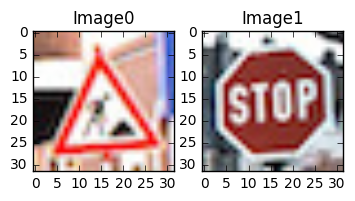

In [15]:
import pylab as plt
%matplotlib inline

image0 = imread("construction.jpg")
image1 = imread("stop.jpg")

plt.figure(1, figsize=(4,4))

plt.subplot("121")
plt.imshow(image0)
_ = plt.title("Image0")

plt.subplot("122")
plt.imshow(image1)
_ = plt.title("Image1")